# CASO PRÁCTICO 1
## Ciencia y analítica de datos

Integrantes: CARLOS PADILLA & XAVIER ASMAL

# Librerías

In [ ]:
# Cargamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga y Visualización Inicial del Dataset
Propósito: Cargar el conjunto de datos data.csv y visualizar las primeras 10 filas para entender su estructura y contenido.

Interpretación: Permite verificar que los datos se han cargado correctamente y proporciona una visión preliminar de las columnas y algunos valores iniciales.

In [ ]:
# Cargar el conjunto de datos del Titanic del PC
# titanic_df = pd.read_csv('titanic.csv')
# titanic_df = sns.load_dataset("titanic")

# Colab
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo CSV
file_path = '/content/data.csv'

# Leer el archivo CSV
data = pd.read_csv(file_path)

# Ver las primeras filas del conjunto de datos
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          

# 2. Estadísticas Descriptivas
Propósito: Calcular estadísticas descriptivas de las variables numéricas y categóricas.

Interpretación: Proporciona un resumen de las principales métricas (como media, desviación estándar, mínimos, máximos, etc.) de las características numéricas y una vista general de las variables categóricas.

In [ ]:

# Estadísticas descriptivas
print(data.describe())

# Estadísticas de variables categóricas
print(data.describe(include=['object']))


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

# 3. Preprocesamiento de Datos
Propósito: Convertir la variable categórica diagnosis a numérica (1 para maligno y 0 para benigno) y descartar la columna de identificación id que no aporta información relevante para el análisis.

Interpretación: Facilita el análisis posterior, ya que la variable objetivo diagnosis está ahora en formato numérico, y elimina columnas innecesarias.

In [ ]:
# Sustituir 'M' por 1 y 'B' por 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Ver las primeras filas del conjunto de datos
print(data.head(10))

# Descartar la columna del identificador
data = data.drop(columns=['id'])

# Ver las primeras filas del conjunto de datos
print(data.head(10))

# 4. Verificación de Datos Faltantes
Propósito: Verificar si hay valores faltantes en el conjunto de datos y eliminar la columna Unnamed: 32 que probablemente no contiene información útil.

Interpretación: Garantiza que no hay valores faltantes en el dataset, lo que es crucial para un análisis preciso y confiable.

In [ ]:

#Verifica los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(data).sum())

data = data.drop(columns=['Unnamed: 32'])

#Verifica los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(data).sum())

# Estadísticas descriptivas
statistics = data.describe()


# 5. Visualización de la Distribución de Diagnósticos
Propósito: Visualizar la distribución de casos benignos y malignos.

Interpretación: Muestra la proporción de casos benignos y malignos en el conjunto de datos, indicando si el dataset está equilibrado o no.

In [ ]:

# Visualización de la distribución de la variable 'diagnosis'
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribución de Diagnósticos (0 = Benigno, 1 = Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()


# 6. Distribuciones de Características Específicas por Diagnóstico
Propósito: Visualizar la distribución de características específicas (radius_mean, texture_mean, smoothness_mean) según el diagnóstico.

Interpretación: Permite observar cómo estas características varían entre los tumores benignos y malignos, proporcionando pistas sobre su relevancia para la predicción del diagnóstico.

In [ ]:

# Visualización de la Distribución de Radio Medio según Diagnóstico
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='radius_mean', hue='diagnosis', multiple='stack', bins=30)
plt.title('Distribución de Radio Medio según Diagnóstico')
plt.xlabel('Radio Medio')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la Distribución de Textura Media según Diagnóstico
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='texture_mean', hue='diagnosis', multiple='stack', bins=30)
plt.title('Distribución de Textura Media según Diagnóstico')
plt.xlabel('Textura Media')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la Distribución de Suavidad Media según Diagnóstico
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='smoothness_mean', hue='diagnosis', multiple='stack', bins=30)
plt.title('Distribución de Suavidad Media según Diagnóstico')
plt.xlabel('Suavidad Media')
plt.ylabel('Frecuencia')
plt.show()

# 7. Análisis de Correlación
Propósito: Calcular y visualizar las correlaciones entre las características más significativas y el diagnóstico.

Interpretación: Las matrices de correlación ayudan a identificar cuáles características están más fuertemente relacionadas con el diagnóstico de cáncer, proporcionando información valiosa para la selección de características y el desarrollo de modelos predictivos.

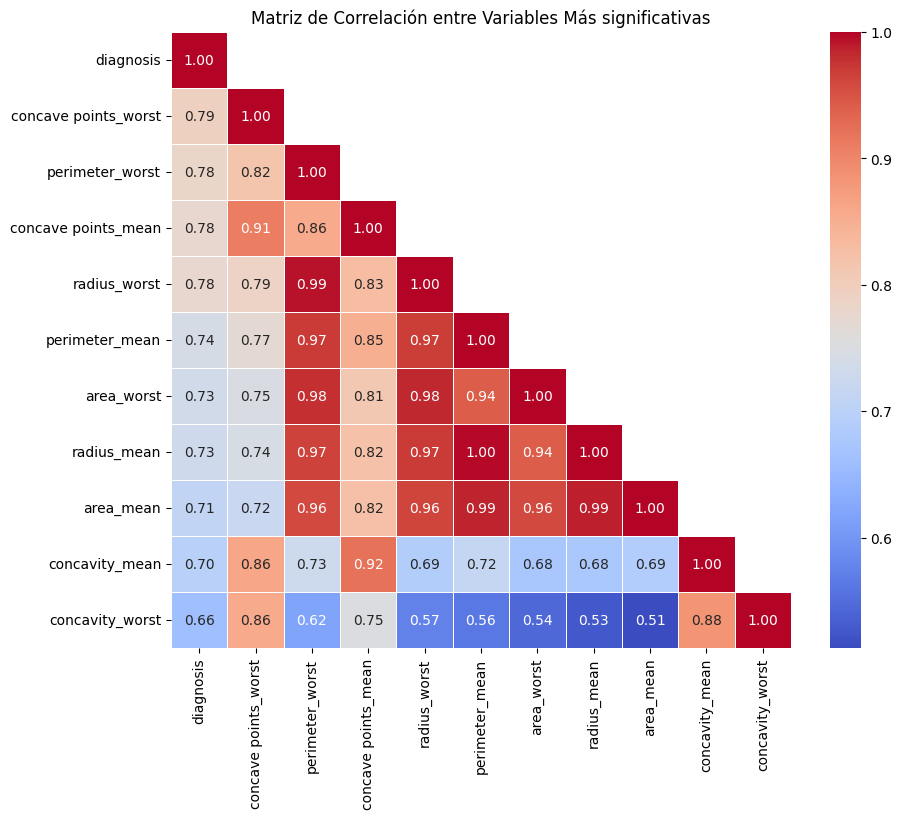

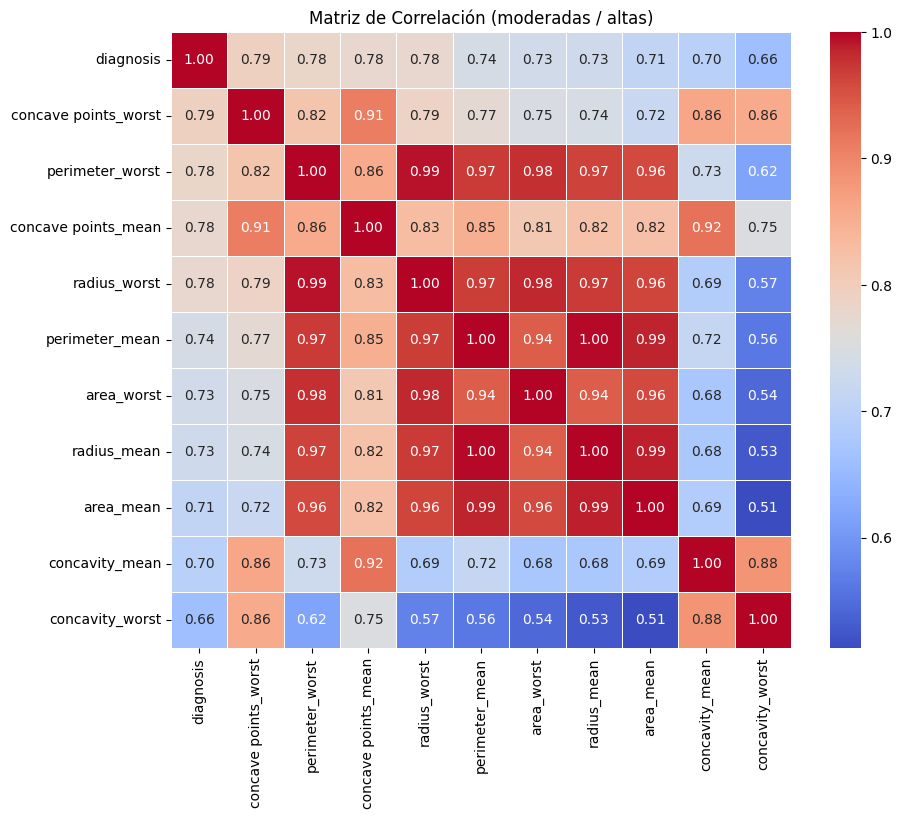

In [ ]:
# Calcular la correlación de todas las variables con 'diagnosis'
correlation_with_target = data.corr()['diagnosis'].sort_values(ascending=False)

# Seleccionar las 10 variables más correlacionadas con 'diagnosis'
top_10_features = correlation_with_target.head(11).index.tolist()  # Incluye 'diagnosis'
top_10_features

# Generar la matriz de correlación solo con las variables más significativas
top_10_corr_matrix = data[top_10_features].corr()
# crea una máscara para ocultar la parte superior de la matriz de correlación
# con k=0 no incluye la diagonal principal y con k=1 si
mask = np.triu(np.ones_like(top_10_corr_matrix, dtype=bool), k=1)

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Más significativas')
plt.show()

# Aplicar una máscara para mostrar solo correlaciones moderadas/altas mayores a 0.4
mask = np.abs(top_10_corr_matrix) < 0.4
top_10_corr_matrix[mask] = np.nan
# Crear un mapa de calor de correlación con valores significativos
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (moderadas / altas)')
plt.show()


##Principales Observaciones de la Correlación:

###Variables Altamente Correlacionadas con diagnosis:
        **Radio Medio (radius_mean):** Una alta correlación positiva con el diagnóstico indica que, a medida que aumenta el radio medio del tumor, es más probable que el tumor sea maligno.
       ** Perímetro Medio (perimeter_mean):** Similar al radio medio, el perímetro medio tiene una alta correlación positiva, sugiriendo que los tumores malignos tienden a tener perímetros más grandes.
        **Área Media (area_mean):** Los tumores malignos tienden a tener áreas más grandes, como lo indica la alta correlación positiva.
        **Suavidad Media (smoothness_mean):** Aunque con una menor correlación positiva, también sugiere que los tumores más suaves son más probablemente malignos.
        **Concavidad Media (concavity_mean) y Puntos Cóncavos Medios (concave points_mean):** Ambas características muestran alta correlación positiva con el diagnóstico maligno, lo que indica que los tumores malignos tienden a tener más concavidades y puntos cóncavos.

### Variables con Correlación Negativa o Baja:
        **Fractal Dimension Mean (fractal_dimension_mean):** Tiene una baja correlación con el diagnóstico, lo que sugiere que no es un buen predictor del tipo de tumor.
        **Symmetry Mean (symmetry_mean):** También tiene una correlación baja con el diagnóstico, indicando que la simetría no varía significativamente entre tumores benignos y malignos.

# 8. Visualización de Características Clave mediante Boxplots
Propósito: Visualizar la distribución de características clave (radius_mean, texture_mean, perimeter_mean, area_mean) según el diagnóstico usando boxplots.

Interpretación: Los boxplots permiten comparar la distribución de estas características entre los diagnósticos benignos y malignos, mostrando si hay diferencias significativas que podrían ser útiles para la predicción del diagnóstico.

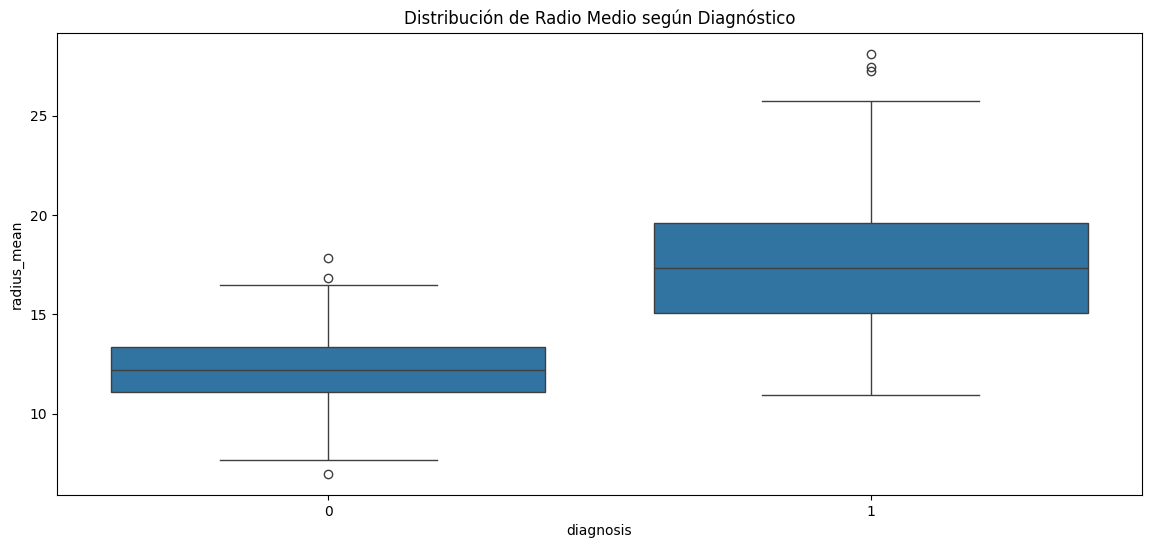

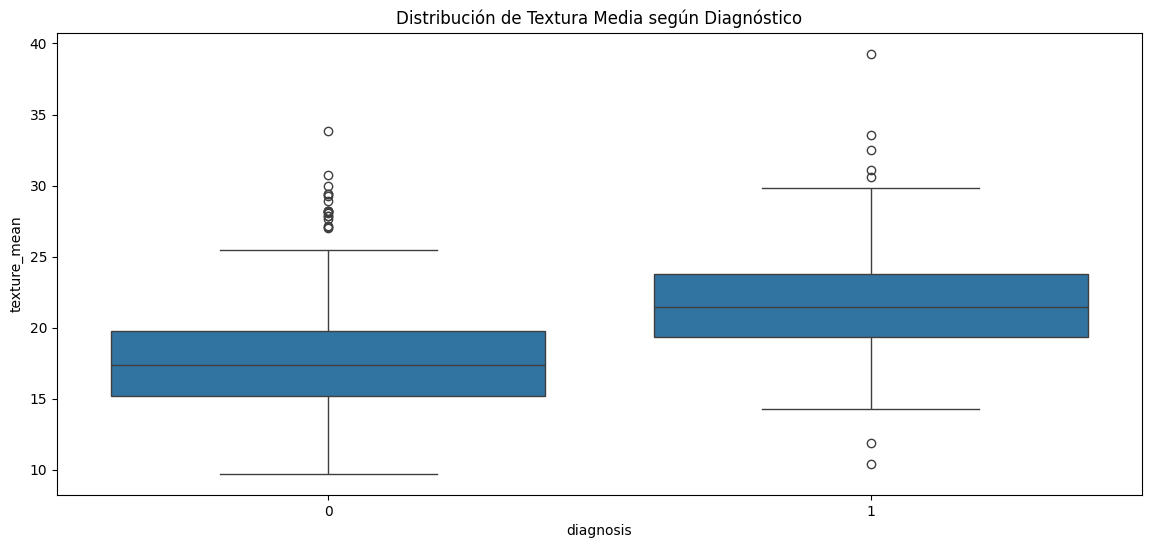

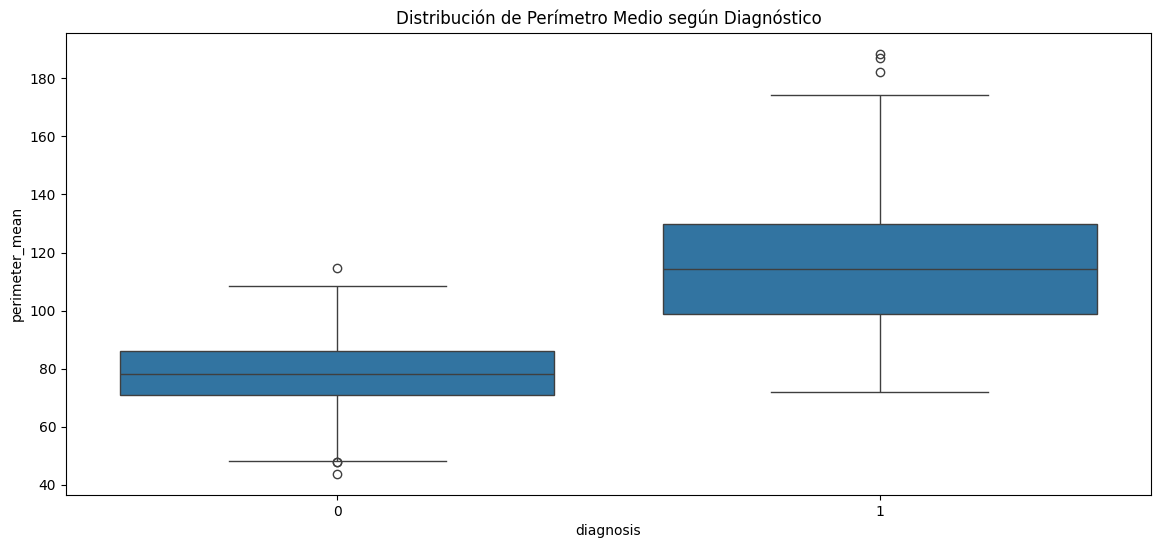

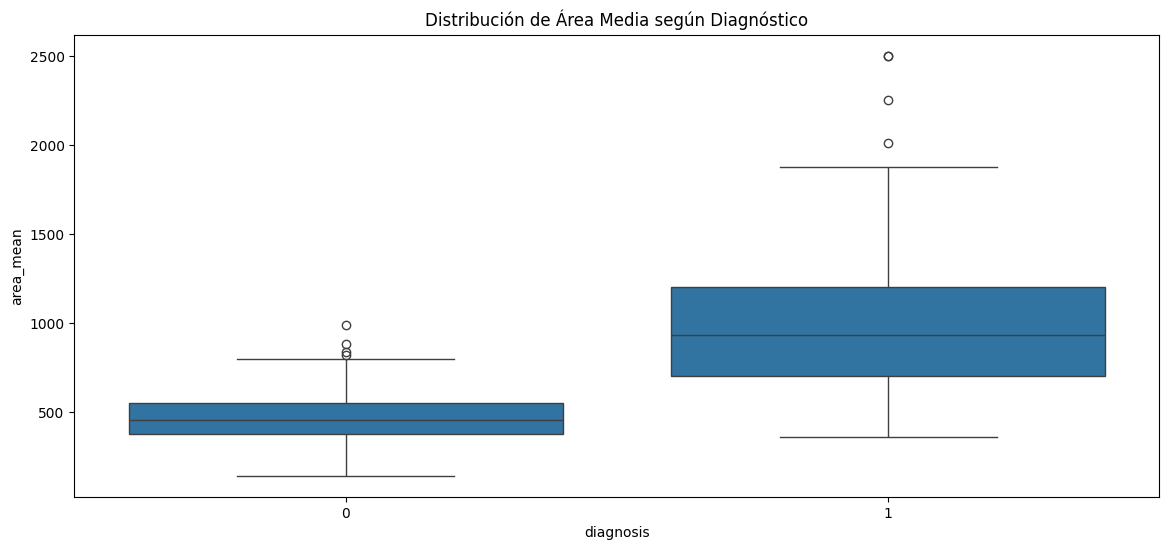

In [ ]:

# Visualización de algunas variables importantes

plt.figure(figsize=(14, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Distribución de Radio Medio según Diagnóstico')
plt.show()


# Distribución
plt.figure(figsize=(14, 6))
sns.boxplot(x='diagnosis', y='texture_mean', data=data)
plt.title('Distribución de Textura Media según Diagnóstico')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='diagnosis', y='perimeter_mean', data=data)
plt.title('Distribución de Perímetro Medio según Diagnóstico')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='diagnosis', y='area_mean', data=data)
plt.title('Distribución de Área Media según Diagnóstico')
plt.show()

# Conclusión

Este análisis proporciona una comprensión detallada del dataset de cáncer de mama. A través de diversas técnicas de visualización y análisis estadístico, hemos identificado características clave que pueden ayudar en la predicción del diagnóstico de cáncer de mama. La correlación y los gráficos de distribución muestran que ciertas características tienen una relación significativa con el diagnóstico, lo cual es esencial para construir modelos predictivos eficaces.